## **Used Car Price Prediction**

This dataset contains information about used cars. This data can be used for a lot of purposes such as price prediction. The columns in the given dataset are as follows:

- name
- year
- selling_price
- km_driven
- fuel
- seller_type
- transmission
- owner

We are constructing a model to predict the price of the car

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


#### **Data Exploration**

In [3]:
df.shape

(4340, 8)

In [4]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


Observation: No prominent Outliers found

In [5]:
df.isnull().values.any()

False

Observation: No null values found

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [7]:
print('Fuel unique values = ', df['fuel'].unique())
print('Seller type unique values = ', df['seller_type'].unique())
print('Transmission unique values = ', df['transmission'].unique())
print('Owner unique values = ', df['owner'].unique())

Fuel unique values =  ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
Seller type unique values =  ['Individual' 'Dealer' 'Trustmark Dealer']
Transmission unique values =  ['Manual' 'Automatic']
Owner unique values =  ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [8]:
df["car_age"] = df["year"].apply(lambda x: 2022-x)
df.drop("year", axis=1, inplace=True)
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,15
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,15
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,10
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,5
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,8


<AxesSubplot:xlabel='fuel', ylabel='count'>

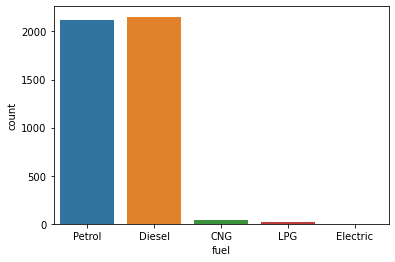

In [9]:
import seaborn as sns
sns.countplot(x="fuel", data=df)

Observation: Majority of the vehicles are either petrol vehicle or diesel vehicle

<AxesSubplot:xlabel='seller_type', ylabel='count'>

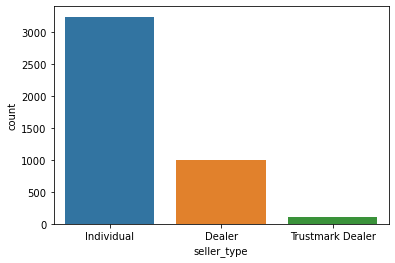

In [10]:
sns.countplot(x="seller_type", data=df)

Observation: Individual seller is the largest seller type

<AxesSubplot:xlabel='transmission', ylabel='count'>

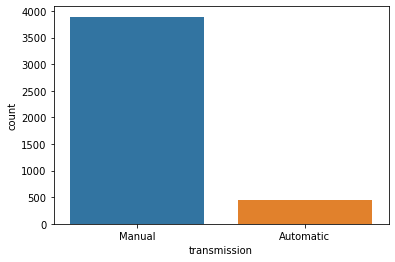

In [11]:
sns.countplot(x="transmission", data=df)

Observation: Majority of the vehicles transmissions is Manual

<AxesSubplot:xlabel='owner', ylabel='count'>

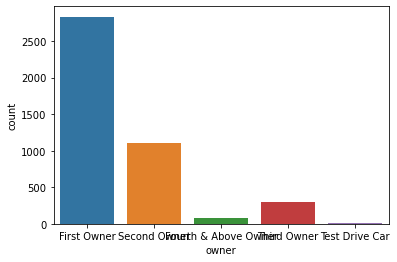

In [12]:
sns.countplot(x="owner", data=df)

Observation: First owner is the largest owner type

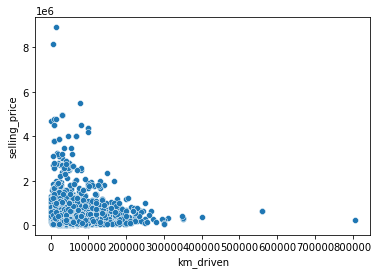

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data = df, x = "km_driven", y = "selling_price")
plt.show()

Observation: selling_price and km_driven are inversely proportional

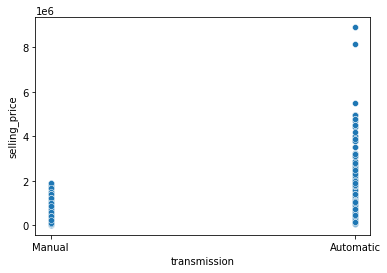

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data = df, x = "transmission", y = "selling_price")
plt.show()

In [15]:
df.replace(to_replace ="First Owner", value =0, inplace=True)
df.replace(to_replace ="Second Owner", value =1, inplace=True)
df.replace(to_replace ="Third Owner", value =2, inplace=True)
df.replace(to_replace ="Fourth & Above Owner", value =3, inplace=True)
df.replace(to_replace ="Test Drive Car", value =4, inplace=True)
df

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,0,15
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,0,15
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,0,10
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,0,5
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,1,8
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),409999,80000,Diesel,Individual,Manual,1,8
4336,Hyundai i20 Magna 1.4 CRDi,409999,80000,Diesel,Individual,Manual,1,8
4337,Maruti 800 AC BSIII,110000,83000,Petrol,Individual,Manual,1,13
4338,Hyundai Creta 1.6 CRDi SX Option,865000,90000,Diesel,Individual,Manual,0,6


<AxesSubplot:>

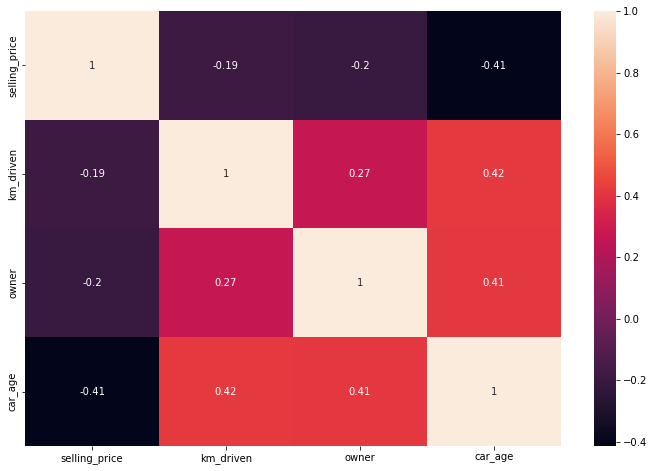

In [16]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True)

Observations
- Selling Price and Km Driven -  Inverse Correlation
- Selling Price and Owner -  Inverse Correlation
- Selling Price and Car age -  Inverse Correlation

In [17]:
df2 = df.drop(["fuel","seller_type","transmission"], axis='columns')
df2

,name,selling_price,km_driven,owner,car_age
0,Maruti 800 AC,60000,70000,0,15
1,Maruti Wagon R LXI Minor,135000,50000,0,15
2,Hyundai Verna 1.6 SX,600000,100000,0,10
3,Datsun RediGO T Option,250000,46000,0,5
4,Honda Amaze VX i-DTEC,450000,141000,1,8
...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),409999,80000,1,8
4336,Hyundai i20 Magna 1.4 CRDi,409999,80000,1,8
4337,Maruti 800 AC BSIII,110000,83000,1,13
4338,Hyundai Creta 1.6 CRDi SX Option,865000,90000,0,6


In [18]:
df["name"].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

#### **Creating dummy variables for car model**

In [19]:
dummies = pd.get_dummies(df.name)
dummies

,Ambassador CLASSIC 1500 DSL AC,Ambassador Classic 2000 Dsz,Ambassador Grand 1800 ISZ MPFI PW CL,Audi A4 1.8 TFSI,Audi A4 2.0 TDI,Audi A4 2.0 TDI 177 Bhp Premium Plus,Audi A4 3.0 TDI Quattro,Audi A4 30 TFSI Technology,Audi A4 35 TDI Premium,Audi A4 35 TDI Premium Plus,...,Volkswagen Vento Diesel Trendline,Volkswagen Vento IPL II Diesel Trendline,Volkswagen Vento Magnific 1.6 Highline,Volkswagen Vento New Diesel Highline,Volkswagen Vento Petrol Highline,Volkswagen Vento Petrol Highline AT,Volvo V40 D3 R Design,Volvo XC 90 D5 Inscription BSIV,Volvo XC60 D3 Kinetic,Volvo XC60 D5 Inscription
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4338,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df3 = pd.concat([df2,dummies],axis='columns')

**Now, Drop one column to avoid dummy variable trap**

In [21]:
df4 = df3.drop(['name','Volvo XC60 D5 Inscription'], axis='columns')
df4

,selling_price,km_driven,owner,car_age,Ambassador CLASSIC 1500 DSL AC,Ambassador Classic 2000 Dsz,Ambassador Grand 1800 ISZ MPFI PW CL,Audi A4 1.8 TFSI,Audi A4 2.0 TDI,Audi A4 2.0 TDI 177 Bhp Premium Plus,...,Volkswagen Vento Diesel Style Limited Edition,Volkswagen Vento Diesel Trendline,Volkswagen Vento IPL II Diesel Trendline,Volkswagen Vento Magnific 1.6 Highline,Volkswagen Vento New Diesel Highline,Volkswagen Vento Petrol Highline,Volkswagen Vento Petrol Highline AT,Volvo V40 D3 R Design,Volvo XC 90 D5 Inscription BSIV,Volvo XC60 D3 Kinetic
0,60000,70000,0,15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,135000,50000,0,15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,600000,100000,0,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,250000,46000,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,450000,141000,1,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,409999,80000,1,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4336,409999,80000,1,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4337,110000,83000,1,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4338,865000,90000,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### **Spliting into X and Y and then using train_test_split**

In [22]:
X = df4.drop(['selling_price'],axis='columns')
y = df4.selling_price

In [23]:
X

,km_driven,owner,car_age,Ambassador CLASSIC 1500 DSL AC,Ambassador Classic 2000 Dsz,Ambassador Grand 1800 ISZ MPFI PW CL,Audi A4 1.8 TFSI,Audi A4 2.0 TDI,Audi A4 2.0 TDI 177 Bhp Premium Plus,Audi A4 3.0 TDI Quattro,...,Volkswagen Vento Diesel Style Limited Edition,Volkswagen Vento Diesel Trendline,Volkswagen Vento IPL II Diesel Trendline,Volkswagen Vento Magnific 1.6 Highline,Volkswagen Vento New Diesel Highline,Volkswagen Vento Petrol Highline,Volkswagen Vento Petrol Highline AT,Volvo V40 D3 R Design,Volvo XC 90 D5 Inscription BSIV,Volvo XC60 D3 Kinetic
0,70000,0,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50000,0,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,100000,0,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,46000,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,141000,1,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,80000,1,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4336,80000,1,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4337,83000,1,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4338,90000,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

#### **Splitting into Train set and Test set**

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

#### **Model Formation**

In [26]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
lr_model.score(X_test,y_test)

-45571815820615.42

In [27]:
from sklearn import linear_model
lasso_model = linear_model.Lasso(alpha=2, selection='random')
lasso_model.fit(X_train,y_train)
lasso_model.score(X_test,y_test)

0.6896930152313916

Observation: In this case Lasso regression model gives better accuracy than Linear regression model

In [28]:
def predict_price(name,km_driven,owner,car_age):    
    loc_index = np.where(X.columns==name)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = km_driven
    x[1] = owner
    x[2] = car_age
    if loc_index >= 0:
        x[loc_index] = 1

    return lasso_model.predict([x])[0]

#### **Predict price** 

Sample

- Model: Maruti Wagon R LXI Minor
- km_driven:50000
- Owner: First Owner
- Car_age: 15

In [34]:
predict_price('Maruti Wagon R LXI Minor',50000,1,15)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


130159.72422862705

- Predicted Price: 131601
- Expected Price:135000

In [30]:
import pickle
with open('used_car_price.pickle','wb') as f:
    pickle.dump(lasso_model,f)

In [31]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))